In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [ ]:
root_path = './input/btc_ohlc_Oct_2015_to_Oct_2021.csv'

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving btc_ohlc_Oct_2015_to_Oct_2021.csv to btc_ohlc_Oct_2015_to_Oct_2021.csv


In [ ]:
df = pd.read_csv('btc_ohlc_Oct_2015_to_Oct_2021.csv')
df.head()

,time,low,high,open,close,volume
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [ ]:
df.shape

(3113276, 6)

In [ ]:
df.describe()

,low,high,open,close,volume
count,3.113276e+06,3.113276e+06,3.113276e+06,3.113276e+06,3.113276e+06
mean,1.152825e+04,1.154230e+04,1.153537e+04,1.153541e+04,9.689568e+00
std,1.490292e+04,1.492446e+04,1.491374e+04,1.491379e+04,2.239875e+01
min,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08
25%,1.849557e+03,1.850000e+03,1.849925e+03,1.849980e+03,1.331197e+00
50%,7.099990e+03,7.105000e+03,7.102045e+03,7.102060e+03,3.707298e+00
75%,1.067558e+04,1.068550e+04,1.068027e+04,1.068040e+04,9.761575e+00
max,6.690000e+04,6.699900e+04,6.694122e+04,6.694122e+04,1.549613e+03


**Data Analysis**

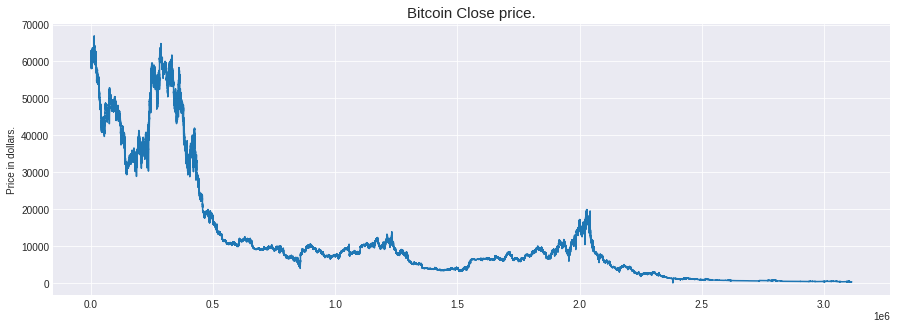

In [ ]:

plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

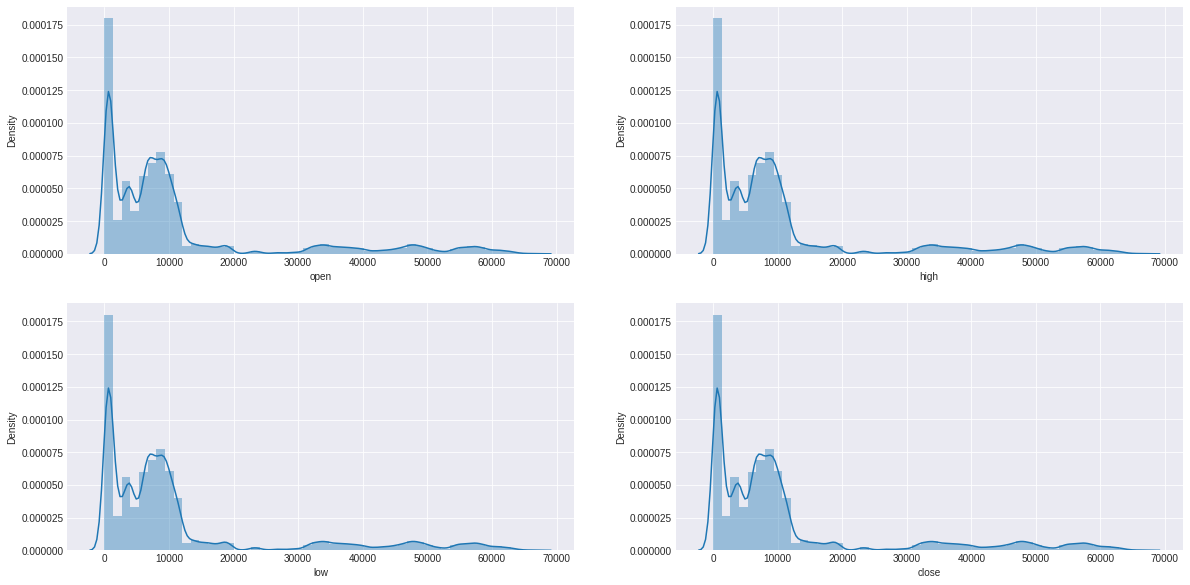

In [ ]:

features = ['open', 'high', 'low', 'close']
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  aa= sb.distplot(df[col])
plt.show()

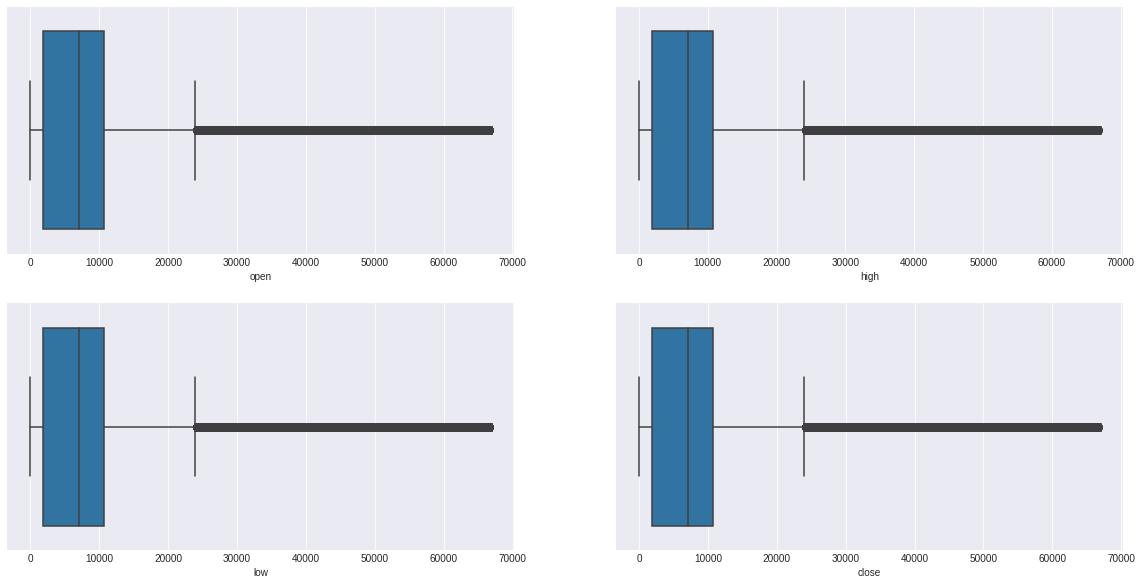

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

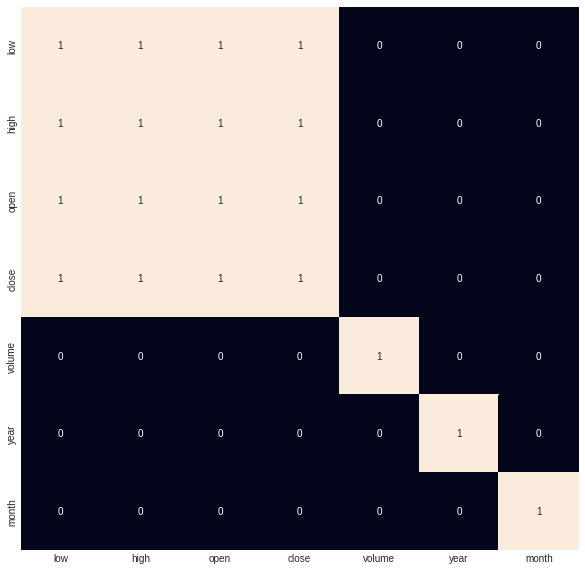

In [ ]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9,annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open', 'low', 'open']]
target = df['volume']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2801948, 3) (311328, 3)


In [ ]:
features = df[['open', 'high', 'close']]
target = df['volume']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2801948, 3) (311328, 3)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['btc_ohlc_Oct_2015_to_Oct_2021.csv']))
print(df)

                        time       low      high      open     close  \
0        2021-10-30 03:00:00  61868.81  61920.00  61888.18  61919.98   
1        2021-10-30 02:59:00  61882.74  61912.67  61903.16  61882.74   
2        2021-10-30 02:58:00  61854.82  61907.96  61854.82  61903.15   
3        2021-10-30 02:57:00  61848.04  61883.02  61883.01  61851.39   
4        2021-10-30 02:56:00  61879.33  61925.42  61907.47  61882.28   
...                      ...       ...       ...       ...       ...   
3113271  2015-10-27 00:04:00    287.07    287.07    287.07    287.07   
3113272  2015-10-27 00:03:00    287.08    287.09    287.08    287.09   
3113273  2015-10-27 00:02:00    286.89    287.10    287.10    286.89   
3113274  2015-10-27 00:01:00    287.09    287.09    287.09    287.09   
3113275  2015-10-27 00:00:00    287.10    287.10    287.10    287.10   

            volume  
0         2.946079  
1         2.942357  
2         3.047848  
3         3.381070  
4         5.663128  
...      

In [ ]:

df.tail()

,time,low,high,open,close,volume
3113271,2015-10-27 00:04:00,287.07,287.07,287.07,287.07,0.08610
3113272,2015-10-27 00:03:00,287.08,287.09,287.08,287.09,0.55440
3113273,2015-10-27 00:02:00,286.89,287.10,287.10,286.89,72.40320
3113274,2015-10-27 00:01:00,287.09,287.09,287.09,287.09,0.82276
3113275,2015-10-27 00:00:00,287.10,287.10,287.10,287.10,0.53620


In [ ]:
df.describe()

,low,high,open,close,volume
count,3.113276e+06,3.113276e+06,3.113276e+06,3.113276e+06,3.113276e+06
mean,1.152825e+04,1.154230e+04,1.153537e+04,1.153541e+04,9.689568e+00
std,1.490292e+04,1.492446e+04,1.491374e+04,1.491379e+04,2.239875e+01
min,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08
25%,1.849557e+03,1.850000e+03,1.849925e+03,1.849980e+03,1.331197e+00
50%,7.099990e+03,7.105000e+03,7.102045e+03,7.102060e+03,3.707298e+00
75%,1.067558e+04,1.068550e+04,1.068027e+04,1.068040e+04,9.761575e+00
max,6.690000e+04,6.699900e+04,6.694122e+04,6.694122e+04,1.549613e+03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113276 entries, 0 to 3113275
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    object 
 1   low     float64
 2   high    float64
 3   open    float64
 4   close   float64
 5   volume  float64
dtypes: float64(5), object(1)
memory usage: 142.5+ MB


In [ ]:
df_datetype = df.astype({'time': 'datetime64'})

In [ ]:
df_datetype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113276 entries, 0 to 3113275
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   time    datetime64[ns]
 1   low     float64       
 2   high    float64       
 3   open    float64       
 4   close   float64       
 5   volume  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 142.5 MB


In [ ]:
df_datetype.head()

,time,low,high,open,close,volume
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


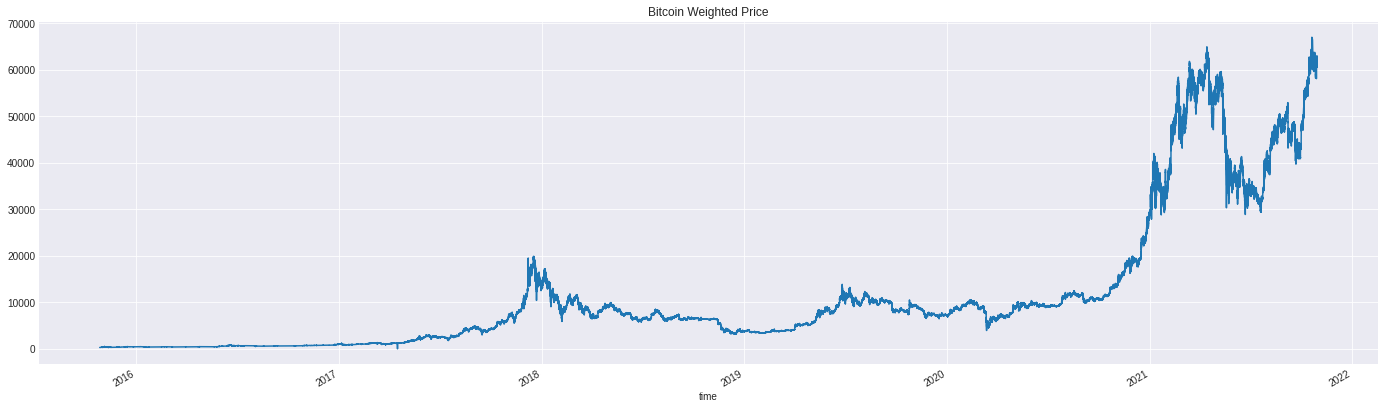

In [ ]:
df_datetype.set_index("time").close.plot(figsize=(24,7), title="Bitcoin Weighted Price")

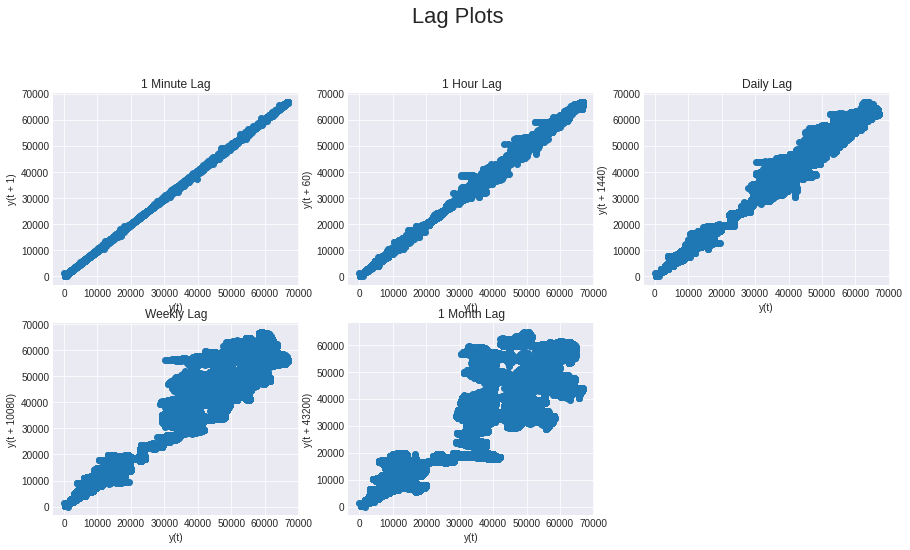

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(df_datetype['close'], lag=1) #minute lag
plt.title('1 Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df_datetype['close'], lag=60) #hourley lag
plt.title('1 Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(df_datetype['close'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(df_datetype['close'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(df_datetype['close'], lag=43200) #month lag
plt.title('1 Month Lag')

plt.legend()
plt.show()

**Making data ready for LSTM**

In [ ]:
df_datetype['date'] = pd.to_datetime(df_datetype['time'],unit='s').dt.date

display(df_datetype.head())

group = df_datetype.groupby('date')

btc_closing_price_groupby_date = group['close'].mean()

,time,low,high,open,close,volume,date
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079,2021-10-30
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357,2021-10-30
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848,2021-10-30
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070,2021-10-30
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128,2021-10-30


**Train Test Split**

In [ ]:
prediction_days = 60


df_train= btc_closing_price_groupby_date[:len(btc_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)



df_test= btc_closing_price_groupby_date[len(btc_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)


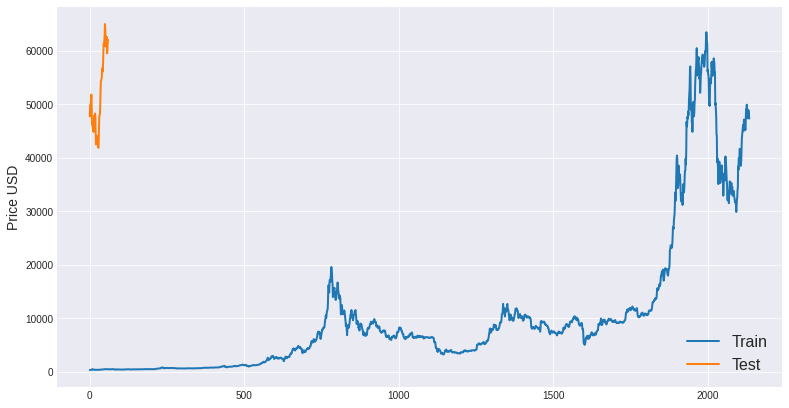

In [ ]:
chosen_col = 'Close'

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

**Data set generator**

In [ ]:
def dataset_generator_lstm(dataset, look_back=5):
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep. 
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)

trainX:  (2131, 5)
trainY:  (2131,)
testX:  (55, 5)
testY (55,)


In [ ]:
print("trainX: ", trainX)

trainX:  [[0.00000000e+00 1.44159882e-04 2.79473948e-04 5.34851927e-04
  4.90695552e-04]
 [1.44159882e-04 2.79473948e-04 5.34851927e-04 4.90695552e-04
  4.21819458e-04]
 [2.79473948e-04 5.34851927e-04 4.90695552e-04 4.21819458e-04
  7.33745838e-04]
 ...
 [7.69797191e-01 7.59576884e-01 7.45106076e-01 7.51304260e-01
  7.69632673e-01]
 [7.59576884e-01 7.45106076e-01 7.51304260e-01 7.69632673e-01
  7.65970936e-01]
 [7.45106076e-01 7.51304260e-01 7.69632673e-01 7.65970936e-01
  7.56740572e-01]]


**Reshape and train data**

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (2131, 5, 1)
Shape of testX:  (55, 5, 1)


In [ ]:
print("trainX: ", trainX)
print(" ********** ")
print("testX: ", testX)

trainX:  [[[0.00000000e+00]
  [1.44159882e-04]
  [2.79473948e-04]
  [5.34851927e-04]
  [4.90695552e-04]]

 [[1.44159882e-04]
  [2.79473948e-04]
  [5.34851927e-04]
  [4.90695552e-04]
  [4.21819458e-04]]

 [[2.79473948e-04]
  [5.34851927e-04]
  [4.90695552e-04]
  [4.21819458e-04]
  [7.33745838e-04]]

 ...

 [[7.69797191e-01]
  [7.59576884e-01]
  [7.45106076e-01]
  [7.51304260e-01]
  [7.69632673e-01]]

 [[7.59576884e-01]
  [7.45106076e-01]
  [7.51304260e-01]
  [7.69632673e-01]
  [7.65970936e-01]]

 [[7.45106076e-01]
  [7.51304260e-01]
  [7.69632673e-01]
  [7.65970936e-01]
  [7.56740572e-01]]]
 ********** 
testX:  [[[0.25321869]
  [0.33878686]
  [0.34931688]
  [0.35652903]
  [0.36882444]]

 [[0.33878686]
  [0.34931688]
  [0.35652903]
  [0.36882444]
  [0.43055223]]

 [[0.34931688]
  [0.35652903]
  [0.36882444]
  [0.43055223]
  [0.35190522]]

 [[0.35652903]
  [0.36882444]
  [0.43055223]
  [0.35190522]
  [0.19320919]]

 [[0.36882444]
  [0.43055223]
  [0.35190522]
  [0.19320919]
  [0.19855227]

**Final LSTN**

In [ ]:
print("trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features) ", trainX.shape[1])
print("trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features) ", trainX.shape[2])

trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features)  5
trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features)  1


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))

regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]
# callbacks = [checkpoint]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 600, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/600
64/67 [===========================>..] - ETA: 0s - loss: 0.0167
Epoch 1: val_loss improved from inf to 0.06086, saving model to my_best_model.hdf5
67/67 [==============================] - 6s 29ms/step - loss: 0.0165 - val_loss: 0.0609
Epoch 2/600
66/67 [============================>.] - ETA: 0s - loss: 0.0271
Epoch 2: val_loss improved from 0.06086 to 0.02171, saving model to my_best_model.hdf5
67/67 [==============================] - 1s 19ms/step - loss: 0.0271 - val_loss: 0.0217
Epoch 3/600
66/67 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 3: val_loss improved from 0.02171 to 0.01442, saving model to my_best_model.hdf5
67/67 [==============================] - 1s 19ms/step - loss: 0.0035 - val_loss: 0.0144
Epoch 4/600
65/67 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 4: val_loss did not improve from 0.01442
67/67 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 0.0183
Epoch 5/600
65/67 [=====================


**Plot line graph approach to show Loss Numbers ** **bold text**

In [ ]:

from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

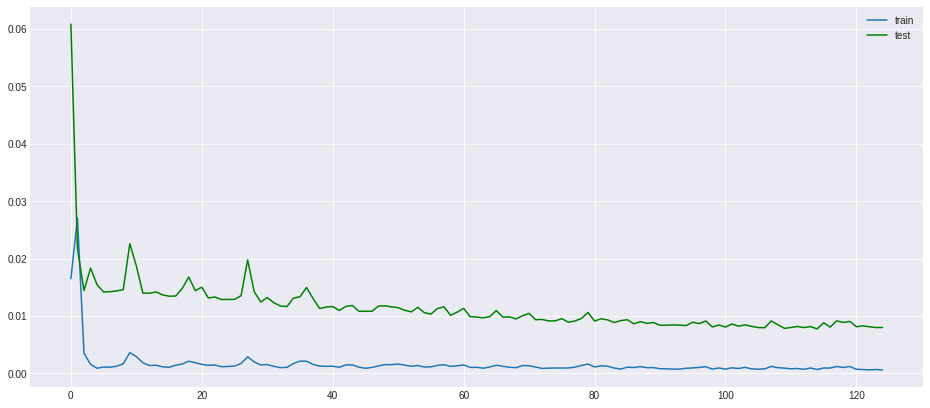

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test',color='green')
plt.legend()
plt.show()


**LSTM Predictions using testX and plotting line graph against Actual testY**

In [ ]:
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

2/2 [==============================] - 1s 10ms/step


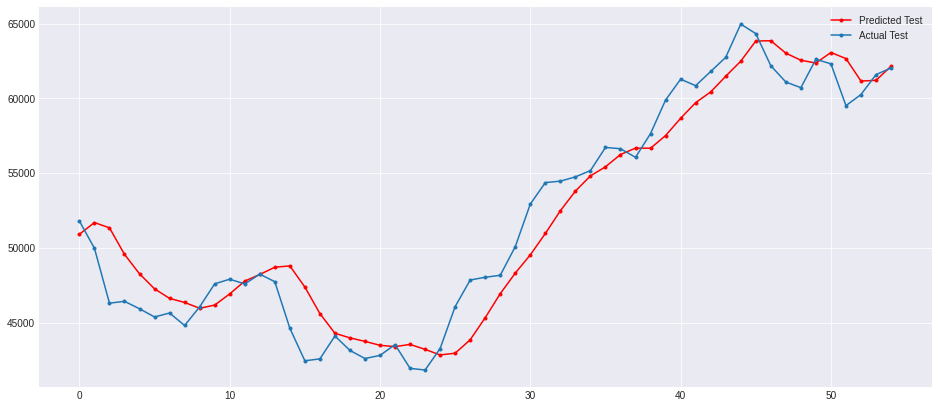

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

**LSTM Prediction using trainX and plotting line graph against Actual trainY**

In [ ]:
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

67/67 [==============================] - 1s 7ms/step


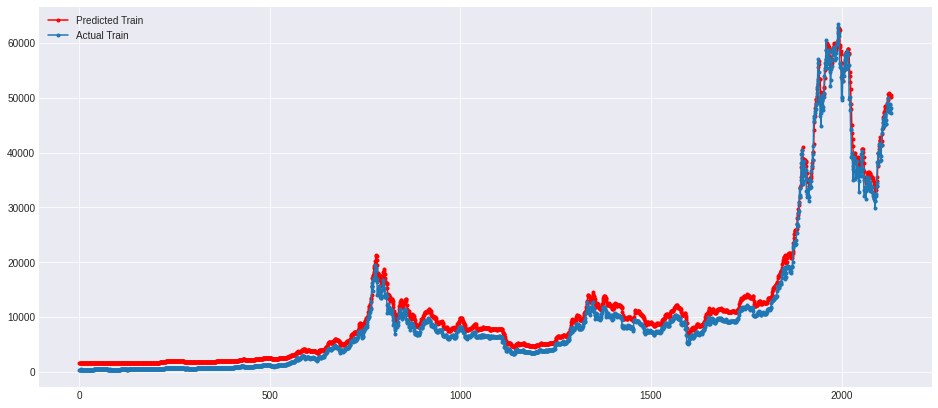

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

**Future Price Predictions - For 5 Days beyond the actual trading days where there is no idea for realtime data**

In [ ]:
testX
testX.shape

(55, 5, 1)

In [ ]:
lookback_period = 5


testX_last_5_days = testX[testX.shape[0] - lookback_period :  ]

testX_last_5_days.shape

(5, 5, 1)

In [ ]:
testX_last_5_days

array([[[0.97247556],
        [0.87962325],
        [0.83248555],
        [0.81613368],
        [0.89829139]],

       [[0.87962325],
        [0.83248555],
        [0.81613368],
        [0.89829139],
        [0.88503214]],

       [[0.83248555],
        [0.81613368],
        [0.89829139],
        [0.88503214],
        [0.76423277]],

       [[0.81613368],
        [0.89829139],
        [0.88503214],
        [0.76423277],
        [0.7963598 ]],

       [[0.89829139],
        [0.88503214],
        [0.76423277],
        [0.7963598 ],
        [0.85391712]]])

In [ ]:
predicted_5_days_forecast_price_test_x = []

for i in range(5):  
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])
  
  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))

  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)
  
print("Forecast for the next 5 Days Beyond the actual trading days ", np.array(predicted_5_days_forecast_price_test_x)) 

1/1 [==============================] - 0s 28ms/step
Forecast for the next 5 Days Beyond the actual trading days  [[[63062.895]]

 [[62656.266]]

 [[61152.055]]

 [[61202.42 ]]

 [[62140.67 ]]]


In [ ]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)

predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

In [ ]:
predicted_btc_price_test_data.shape

(55, 1)

In [ ]:
predicted_btc_price_test_data

array([[50905.87 ],
       [51686.996],
       [51334.824],
       [49561.766],
       [48258.29 ],
       [47254.547],
       [46613.754],
       [46343.734],
       [45952.848],
       [46167.34 ],
       [46914.832],
       [47772.934],
       [48215.344],
       [48698.555],
       [48789.3  ],
       [47375.258],
       [45601.53 ],
       [44281.844],
       [43973.105],
       [43740.062],
       [43476.492],
       [43389.844],
       [43537.426],
       [43204.418],
       [42832.69 ],
       [42949.11 ],
       [43845.637],
       [45324.25 ],
       [46930.496],
       [48307.19 ],
       [49528.062],
       [50956.73 ],
       [52478.703],
       [53792.72 ],
       [54810.473],
       [55416.27 ],
       [56239.258],
       [56666.484],
       [56659.156],
       [57508.934],
       [58661.04 ],
       [59707.566],
       [60426.633],
       [61472.04 ],
       [62481.258],
       [63829.14 ],
       [63851.168],
       [63019.594],
       [62545.973],
       [62357.69 ],


In [ ]:
predicted_5_days_forecast_price_test_x

array([[[63062.895]],

       [[62656.266]],

       [[61152.055]],

       [[61202.42 ]],

       [[62140.67 ]]], dtype=float32)

In [ ]:

predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()

predicted_5_days_forecast_price_test_x

array([63062.895, 62656.266, 61152.055, 61202.42 , 62140.67 ],
      dtype=float32)

In [ ]:
predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()

predicted_btc_price_test_data

array([50905.87 , 51686.996, 51334.824, 49561.766, 48258.29 , 47254.547,
       46613.754, 46343.734, 45952.848, 46167.34 , 46914.832, 47772.934,
       48215.344, 48698.555, 48789.3  , 47375.258, 45601.53 , 44281.844,
       43973.105, 43740.062, 43476.492, 43389.844, 43537.426, 43204.418,
       42832.69 , 42949.11 , 43845.637, 45324.25 , 46930.496, 48307.19 ,
       49528.062, 50956.73 , 52478.703, 53792.72 , 54810.473, 55416.27 ,
       56239.258, 56666.484, 56659.156, 57508.934, 58661.04 , 59707.566,
       60426.633, 61472.04 , 62481.258, 63829.14 , 63851.168, 63019.594,
       62545.973, 62357.69 , 63062.895, 62656.26 , 61152.055, 61202.42 ,
       62140.67 ], dtype=float32)

In [ ]:

predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_5_days_forecast_price_test_x))

predicted_btc_test_concatenated

predicted_btc_test_concatenated.shape

(60,)

**Plotting entire Predictions of Test Data (including the Future 5-days ) against Actual testY**

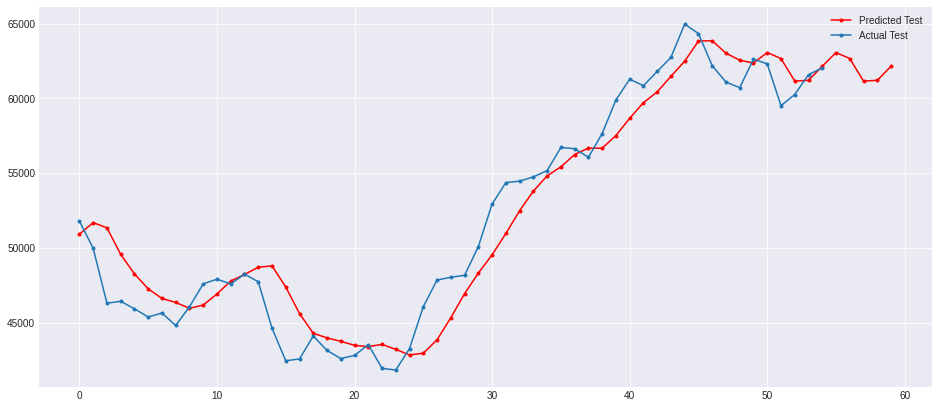

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()